In [1]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

data = pd.read_csv("review.csv")
print(data.head())



   data  reviewerName  score  \
0     0           NaN      4   
1     1          0mie      5   
2     2           1K3      4   
3     3           1m2      5   
4     4  2&amp;1/2Men      5   

                                                Text  reviewTime  day_diff  \
0                                         No issues.  23-07-2014       138   
1  Purchased this for my device, it worked as adv...  25-10-2013       409   
2  it works as expected. I should have sprung for...  23-12-2012       715   
3  This think has worked out great.Had a diff. br...  21-11-2013       382   
4  Bought it with Retail Packaging, arrived legit...  13-07-2013       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
print(data.describe())


              data        score     day_diff  helpful_yes   helpful_no  \
count  4915.000000  4915.000000  4915.000000  4915.000000  4915.000000   
mean   2457.000000     4.587589   437.367040     1.311089     0.210376   
std    1418.982617     0.996845   209.439871    41.619161     4.023296   
min       0.000000     1.000000     1.000000     0.000000     0.000000   
25%    1228.500000     5.000000   281.000000     0.000000     0.000000   
50%    2457.000000     5.000000   431.000000     0.000000     0.000000   
75%    3685.500000     5.000000   601.000000     0.000000     0.000000   
max    4914.000000     5.000000  1064.000000  1952.000000   183.000000   

        total_vote  score_pos_neg_diff  score_average_rating  \
count  4915.000000         4915.000000           4915.000000   
mean      1.521465            1.100712              0.075468   
std      44.123095           39.367949              0.256062   
min       0.000000         -130.000000              0.000000   
25%       0.0

In [3]:
data = data.dropna()


Index(['data', 'reviewerName', 'score', 'Text', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')


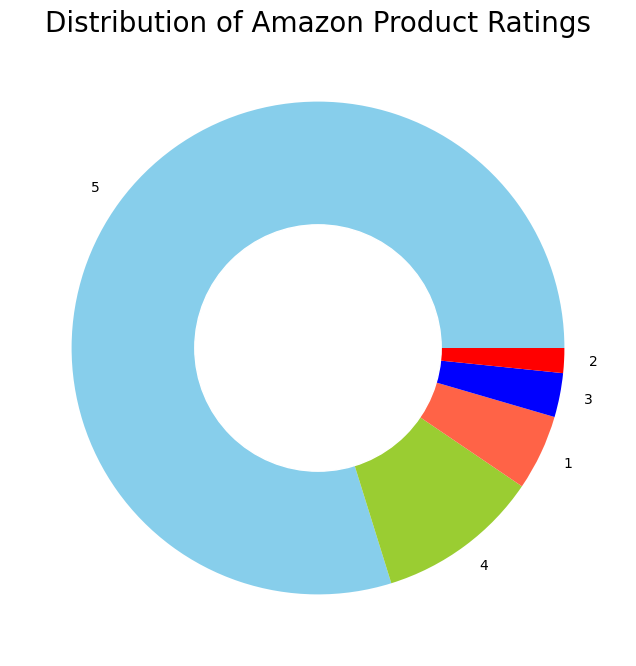

In [5]:
ratings = data["score"].value_counts()
# Check column names in data DataFrame
print(data.columns)

numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [6]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())

   data  reviewerName  score  \
1     1          0mie      5   
2     2           1K3      4   
3     3           1m2      5   
4     4  2&amp;1/2Men      5   
5     5       2Cents!      5   

                                                Text  reviewTime  day_diff  \
1  Purchased this for my device, it worked as adv...  25-10-2013       409   
2  it works as expected. I should have sprung for...  23-12-2012       715   
3  This think has worked out great.Had a diff. br...  21-11-2013       382   
4  Bought it with Retail Packaging, arrived legit...  13-07-2013       513   
5  It's mini storage.  It doesn't do anything els...  29-04-2013       588   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0                   0   
4            0           0           0                   0   
5            0           0  

In [7]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [8]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  765.5469999999979
Negative:  219.70400000000006
Neutral:  3927.775999999992
